#Segmentation based on k means clustering

In [ ]:
!apt install tesseract-ocr
!pip install pytesseract
!pip install --ignore-installed Pillow==9.0.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,815 kB/s)
Selecting previously unselect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 7.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import cv2
import os
import re
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '8.jpg'
img = cv2.imread(path)

In [ ]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 7
attempts=10

In [ ]:
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
text = pytesseract.image_to_string(result_image).encode("utf-8")
text = text.decode('utf-8')
tokens = text.split()
print(tokens)

['JANSONS', 'HEALTH', 'Diagnostic', 'Centre', '+', 'Health', 'Check', 'Mr.', 'RANGARAJAN.V.S', '65', 'Yrs', 'Male', 'Dr.', 'K.L.SATHISH', 'KUMAR', 'MS.,DNB.,PRCS.,DNB.,(SURGICAL', 'GASTROENTEROLGY)', 'PROTOCOL', 'OF', 'STUDY:', 'Serial', 'axial', 'Multislice', 'CT', 'sections', 'of', 'the', 'abdomen', 'were', '‘studied', 'after', 'before', 'and', 'after', 'injection', 'of', 'IV', 'contrast.', 'Arterial,', 'venous', 'and', 'delayed', '}', 'SEQUENTIAL', 'IMAGES', 'DEMONSTRATE:', 'Liver:', 'normal', 'in', 'size', 'with', 'normal', 'density', 'noted.', 'No', 'focal', 'lesion', 'is', '@', '—_—_', 'normal.', 'The', 'intrahepatic', 'portal', 'venous', 'radicals', 'are', 'normal.', 'No', 'evi', 'radicular', 'dilatation.', 'The', 'hepatic', 'veins', 'and', 'intrahepatic', 'portion', 'of', 'There', 'is', 'no', 'evidence', 'of', 'focal', 'liver', 'lesions.', 'Liver', 'shows', 'diffuse', 'fatty', 'infiltration', 'CBD', 'appear', 'normal', 'in', 'calibre.', '\\', 'Par;', 'Gall', 'bladder:', 'shows'

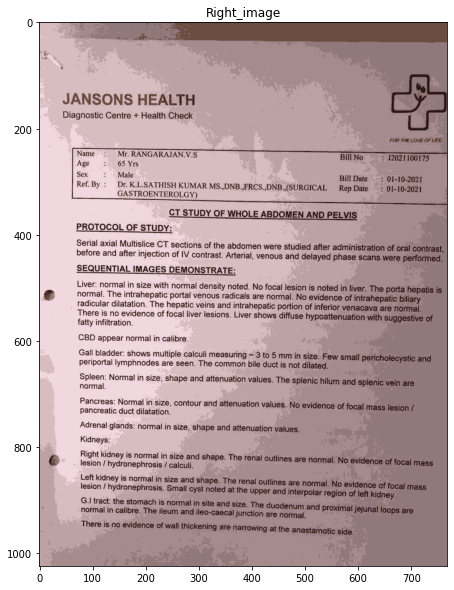

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Right_image')
plt.imshow(result_image, cmap='gray')

In [ ]:
im= cv2.bilateralFilter(img,5, 55,60)
imageL = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
_, imageL = cv2.threshold(imageL, 150, 180, 50)
edges = cv2.dilate(cv2.Canny(imageL,25,255),None)

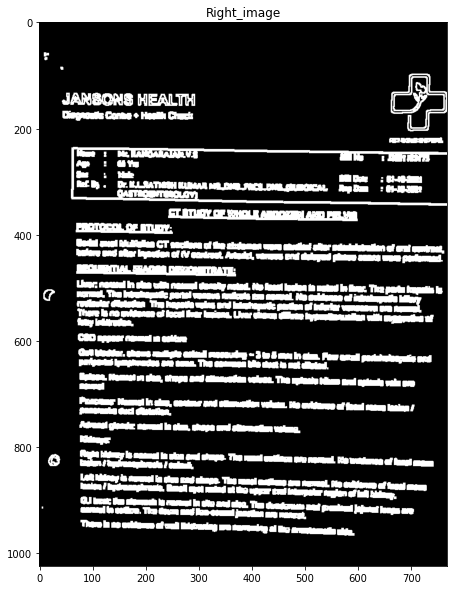

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Right_image')
plt.imshow(edges, cmap='gray')

In [ ]:
text = pytesseract.image_to_string(edges).encode("utf-8")
text = text.decode('utf-8')
tokens = text.split()
print(tokens)

['hearse', 'areal', 'dller', 'peal', 'aleea', 'vtarercaleed', 'te', 'eebeeth', 'renner', 'ret', 's', 'ctatedeaealeearie:', 'mammal', 'eae', 'Spe', 'MeL', 'ne', 'Torre', 'a)', 'by', 'in', 'og', 'eerie', 'miner', 'ahentaen', 'lervetbindperdbeorad', 'tell', 'ML}', 'Le', 'ed', 'wip', 'lan', 'tie', 'aaa', 'a', 'maar', 'nao', 'Py', 'a', 'et', 'been', 'Dataeraetlaeee', 'Lalas', 'ole', 'DL', 'ee', 'ep', 'J', 'fl', 'Ln', '|', 'pmmrer', 'tery', '|', 'nos', 'epee', 'nie', 'eel', '[ee', 'Lt]', 'lee', 'et', 'ne', 'Le', 'a}', 'pe', 'aly', 'bterewcly', 'u-turn', 'ey', 'eee', 'athena', 'Seu', 'nore.', 'is', 'euifensn,', 'rmalhoapammeamaiahag', 'blo', 'elo', 'oy', 'med', 'pa', 'La', 'ol', '‘Thane', 'colton', 'af', 'wal', 'imag', 'we', 'Sewesitg', 'ole', 'erases', 'ge']


In [ ]:
# cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
# mask = np.zeros((256,256), np.uint8)
# masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

In [ ]:
# dst = cv2.bitwise_and(edges, edges, mask=mask)
# segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

NameError: ignored

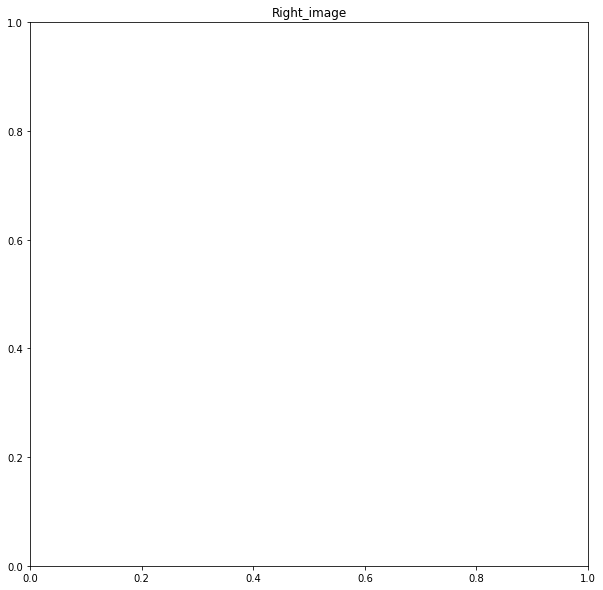

In [ ]:
# plt.figure(figsize=(10,10))
# plt.title('Right_image')
# plt.imshow(segmented, cmap='gray')

NameError: ignored

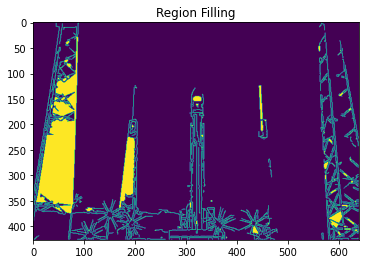

In [ ]:
# code
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage import data,morphology
from skimage.color import rgb2gray
import scipy.ndimage as nd
plt.rcParams["figure.figsize"] = (12,8)
%matplotlib inline

# load images and convert grayscale
rocket = data.rocket()
rocket_wh = rgb2gray(rocket)

# apply edge segmentation
# plot canny edge detection
edges = canny(rocket_wh)
plt.imshow(edges, interpolation='gaussian')
plt.title('Canny detector')

# fill regions to perform edge segmentation
fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im)
plt.title('Region Filling')

# Region Segmentation
# First we print the elevation map
elevation_map = sobel(rocket_wh)
plt.imshow(elevation_map)

# Since, the contrast difference is not much. Anyways we will perform it
markers = np.zeros_like(rocket_wh)
markers[rocket_wh < 0.1171875] = 1 # 30/255
markers[rocket_wh > 0.5859375] = 2 # 150/255

plt.imshow(markers)
plt.title('markers')

# Perform watershed region segmentation
segmentation = morphology.watershed(elevation_map, markers)

plt.imshow(segmentation)
plt.title('Watershed segmentation')

# plot overlays and contour
segmentation = nd.binary_fill_holes(segmentation - 1)
label_rock, _ = nd.label(segmentation)
# overlay image with different labels
image_label_overlay = label2rgb(label_rock, image=rocket_wh)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True)
ax1.imshow(rocket_wh)
ax1.contour(segmentation, [0.8], linewidths=1.8, colors='w')
ax2.imshow(image_label_overlay)

fig.subplots_adjust(**margins)


In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)